In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
import os
os.chdir('/content/drive/MyDrive/MOVIE GENRE CLASSIFICATION')

In [15]:
# Load and preprocess the training dataset
def load_data(file_path):
    """Load and preprocess the dataset."""
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(' ::: ')
            if len(parts) == 4:
                data.append(parts)
    return pd.DataFrame(data, columns=['id', 'title', 'genre', 'plot'])

# Update the path to include your working directory
train_data_path = 'train_data.txt'  # Remove the leading '/'
# or use the full path: train_data_path = '/content/drive/MyDrive/MOVIE GENRE CLASSIFICATION/train_data.txt'
df = load_data(train_data_path)
print("Dataset successfully loaded.")

# Inspect dataset
print("Dataset head:\n", df.head())
print("Dataset info:\n")
df.info()

Dataset successfully loaded.
Dataset head:
   id                             title     genre  \
0  1      Oscar et la dame rose (2009)     drama   
1  2                      Cupid (1997)  thriller   
2  3  Young, Wild and Wonderful (1980)     adult   
3  4             The Secret Sin (1915)     drama   
4  5            The Unrecovered (2007)     drama   

                                                plot  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  
Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      54214 non-null  object
 1   title   54214 non-null  object
 2   genre   54214 non-null  object
 3   plot 

<ipython-input-16-d17ebd863415>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


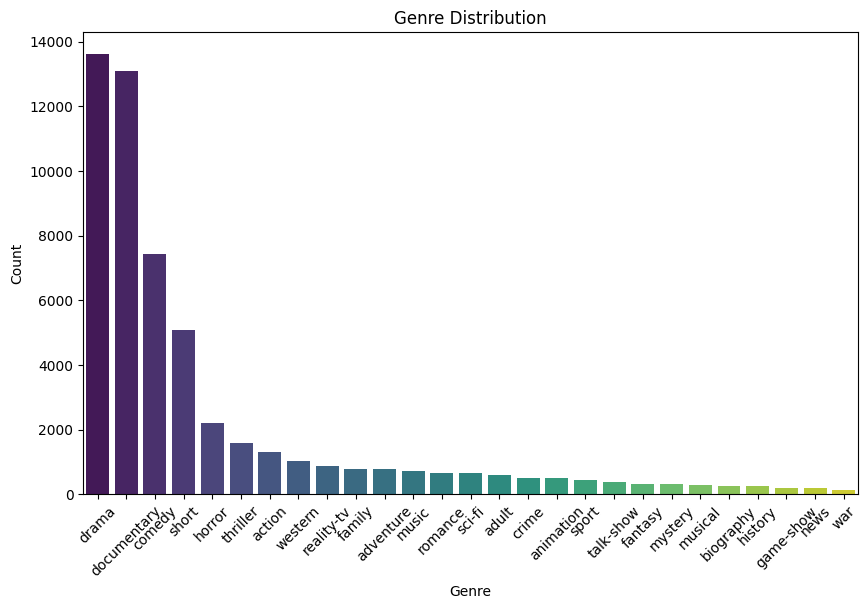

In [16]:
# Step 2: Exploratory Data Analysis and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Check genre distribution
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Step 3: Feature Selection and Engineering
# Preprocess dataset
df = df.dropna(subset=['plot', 'genre'])
print(f"Dataset shape after dropping missing values: {df.shape}")

Dataset shape after dropping missing values: (54214, 4)


In [18]:
# Limit to top genres (optional)
top_genres = df['genre'].value_counts().head(10).index
df = df[df['genre'].isin(top_genres)]
print(f"Dataset shape after limiting to top genres: {df.shape}")

Dataset shape after limiting to top genres: (47039, 4)


In [19]:
# Split the dataset into training and testing sets
X = df['plot']
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Convert text data to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [21]:
# Step 4: Model Training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)
print("Model training completed.")

Model training completed.


In [22]:
# Step 5: Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions
y_pred = model.predict(X_test_tfidf)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6504
Classification Report:
               precision    recall  f1-score   support

      action       0.61      0.29      0.39       263
      comedy       0.59      0.60      0.59      1489
 documentary       0.73      0.87      0.79      2619
       drama       0.61      0.76      0.67      2723
      family       0.90      0.11      0.20       157
      horror       0.74      0.60      0.66       441
  reality-tv       0.59      0.15      0.24       177
       short       0.52      0.32      0.39      1015
    thriller       0.55      0.14      0.22       318
     western       0.95      0.74      0.83       206

    accuracy                           0.65      9408
   macro avg       0.68      0.46      0.50      9408
weighted avg       0.65      0.65      0.63      9408



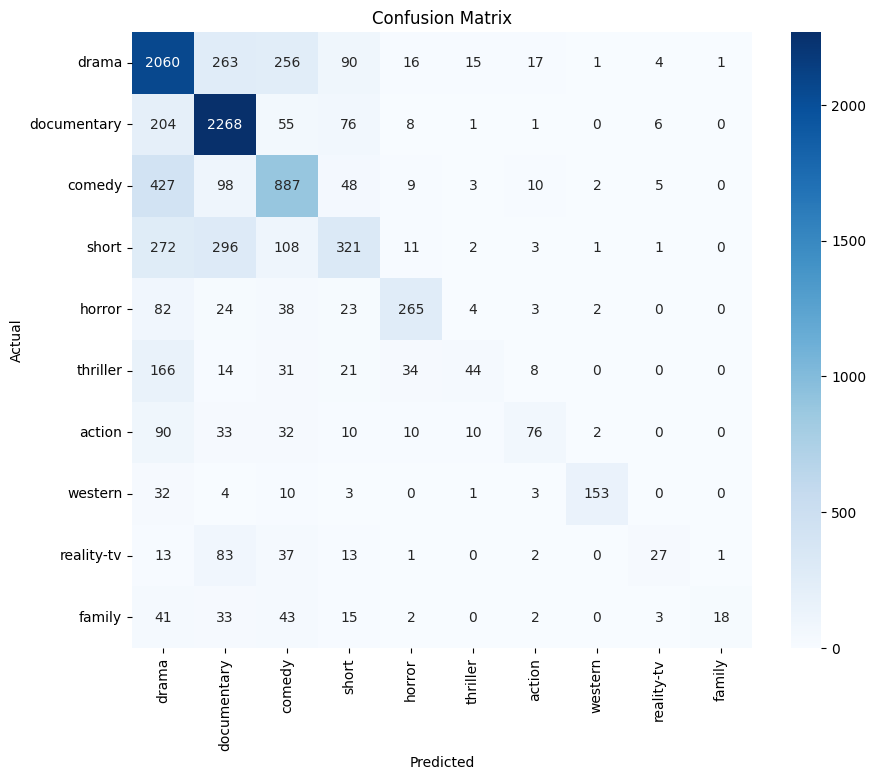

In [24]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=top_genres)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=top_genres, yticklabels=top_genres)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
# Step 6: Prediction
# Define a function for predicting genres
def predict_genre(plot):
    """Predict the genre of a movie given its plot."""
    plot_tfidf = tfidf.transform([plot])
    genre = model.predict(plot_tfidf)[0]
    return genre

# Example usage of the prediction function
example_plot = "A young wizard discovers his magical heritage and attends a school for magic."
predicted_genre = predict_genre(example_plot)
print(f"Predicted genre for example plot: {predicted_genre}")

Predicted genre for example plot: short


In [26]:
# Save the model and vectorizer for future use
import pickle

with open("tfidf_vectorizer.pkl", "wb") as tfidf_file:
    pickle.dump(tfidf, tfidf_file)

with open("logistic_regression_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.
